7.神经网络的前向传播（forward propagation）：假设学习已经全部结束，我们使用学习到的参数，先实现神经网络的“推理处理”

In [ ]:
import sys, os
sys.path.append(os.pardir) # 为了导入父目录中的文件而进行的设定
from dataset.mnist import load_mnist
# 第一次调用会花费几分钟 ……
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,
normalize=False)
# normalize 设置是否将输入图像正规化为 0.0～1.0 的值,False则输入图像的像素会保持原来的 0～255
# flatten 设置是否展开输入图像（变成一维数组）,False则输入图像为 1 × 28 × 28 的三维数组

# 输出各个数据的形状
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000,)
print(x_test.shape) # (10000, 784)
print(t_test.shape) # (10000,)
#训练集60000张，测试集10000张，每张图像被展平为784个像素的一维向量，且像素值未归一化（0-255）。

(60000, 784)
(60000,)
(10000, 784)
(10000,)


假设有一个4x4的图像（共16个像素），展平后的一维数组为：
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

    我们使用reshape(4,4)将其转换为二维数组：

          [ 1,  2,  3,  4],

          [ 5,  6,  7,  8],

          [ 9, 10, 11, 12],

          [13, 14, 15, 16]
第一行是原一维数组的前4个元素，第二行是接下来的4个元素，以此类推

在MNIST数据集中：

    像素值范围：0到255（8位灰度）

    颜色映射：

        0 → 纯黑色 🖤

        255 → 纯白色 🤍

        128 → 中度灰色 ◼️

        其他值在黑白之间渐变


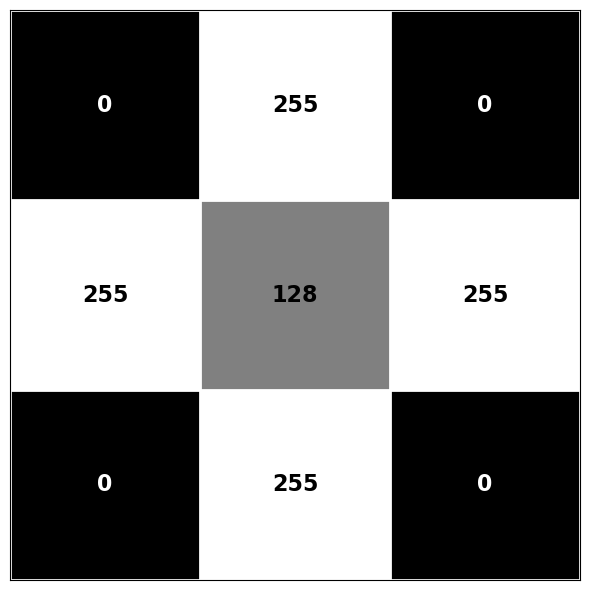

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches

# 创建一维数组
flat_array = [0, 255, 0, 
              255, 128, 255, 
              0, 255, 0]

# 转换为NumPy数组并重塑为3x3
image_2d = np.array(flat_array).reshape(3, 3)

# 创建自定义灰度色彩映射（确保0=纯黑，255=纯白）
cmap = LinearSegmentedColormap.from_list('custom_gray', [(0,0,0), (1,1,1)], N=256)

# 创建大尺寸图形（放大显示）
plt.figure(figsize=(6, 6), dpi=100)
ax = plt.gca()

# 显示图像（使用最近邻插值保持锐利边缘）
img = ax.imshow(image_2d, cmap=cmap, interpolation='nearest', vmin=0, vmax=255)

# 添加网格线（白色细线分隔像素）
for i in range(4):  # 4条线分隔3个像素
    ax.axhline(i - 0.5, color='white', linewidth=2)
    ax.axvline(i - 0.5, color='white', linewidth=2)

# 关闭坐标轴
ax.set_xticks([])
ax.set_yticks([])

# 添加像素值标签
for i in range(3):
    for j in range(3):
        # 根据背景色自动选择文字颜色（深色背景用白色文字）
        color = 'white' if image_2d[i, j] < 128 else 'black'
        ax.text(j, i, f"{image_2d[i, j]}", 
                ha='center', va='center', 
                color=color, fontsize=16, fontweight='bold')

# 显示图像
plt.tight_layout()
plt.show()

5
(784,)
(28, 28)


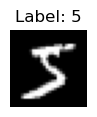

In [ ]:
#加载MNIST数据集，并显示其中的第一张图像
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
import matplotlib.pyplot as plt #使用matplotlib 库而不是 PIL.Image.show()，确保在Jupyter中内联显示图像
%matplotlib inline   

# 加载MNIST数据集
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,
normalize=False)

# 获取第一个训练样本
img = x_train[0]
label = t_train[0]
print(label) # 5

print(img.shape) # (784,)
img = img.reshape(28, 28) # 把图像的形状变成原来的尺寸 （二维数组就构成了一个28x28的网格，每个格子是一个像素）
print(img.shape) # (28, 28)

# 使用matplotlib显示图像
plt.figure(figsize=(1, 1))  # 设置图像大小
plt.imshow(img, cmap='gray')  # 使用灰度色彩映射
plt.title(f"Label: {label}")
plt.axis('off')  # 不显示坐标轴
plt.show()

In [ ]:
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test
#normalize：正规化/正则化（神经网络的输入数据进行某种既定的转换称为预处理，作为对输入图像的一种预处理，我们进行了正规化）
#各个图像的像素值除以 255

def init_network():
    with open("/root/DL/DLfS/MNIST/ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x): #x才是输入层，a是中间层；predict() 函数将输入数据传入神经网络，进行前向传播计算
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y #概率向量（每个元素表示对应类别的概率）

In [21]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 获取概率最高的元素的索引：通过前向传播，依赖权重和偏置
    if p == t[i]: #将预测结果 p 与真实标签 t[i] 比较
        accuracy_cnt += 1
print(x.shape)
print("Accuracy:" + str(float(accuracy_cnt) / len(x))) #预测正确数/总数

(10000, 784)
Accuracy:0.9352


In [24]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']
x.shape
print(x[0].shape)#784个输入
print(W1.shape) #W1[i, j]表示从输入层的第i个神经元到第一隐藏层的第j个神经元的连接权重。作者选择隐藏层只有50个神经元
print(W2.shape)
print(W3.shape) #预测0-9

(784,)
(784, 50)
(50, 100)
(100, 10)


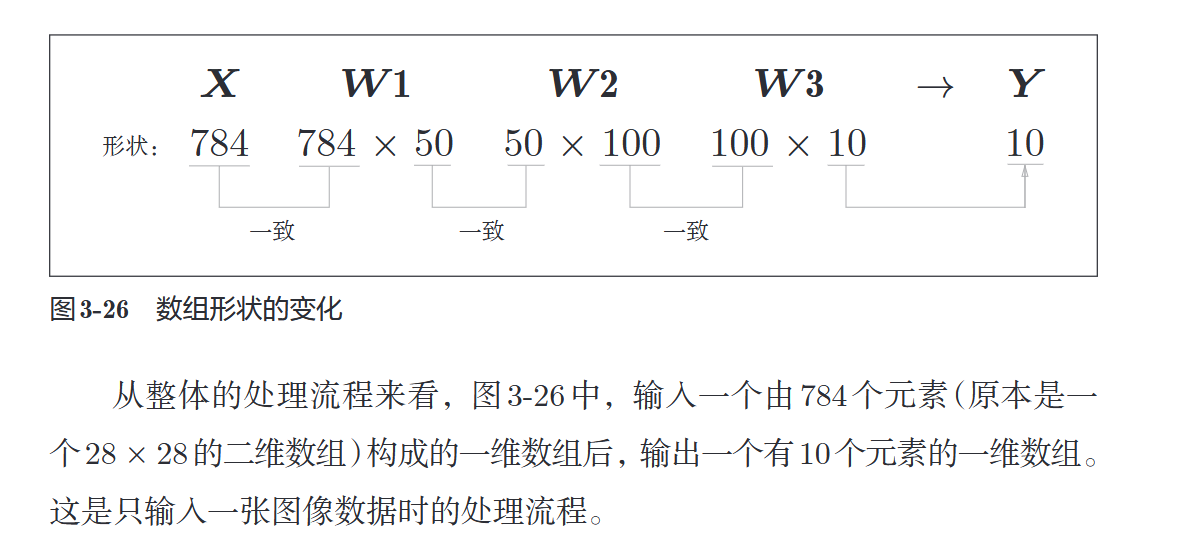

In [25]:
#批处理：把 x 的形状改为 100 × 784，将100 张图像打包作为输入数据
x, t = get_data()
network = init_network()
batch_size = 100 # 批数量
accuracy_cnt = 0
for i in range(0, len(x), batch_size): #若像 range(start, end, step) 这样指定 3 个整数，则生成的列表中的下一个元素会增加 step 指定的值
    x_batch = x[i:i+batch_size] #取出从第 i 个到第 i+batch_n 个之间的数据： x[0:100]、x[100:200]……（从头开始以 100 为单位将数据提取为批数据）
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)#参数 axis=1指定了在 100 × 10 的数组中，沿着第 1 维方向（行方向）找到值最大的元素的索引
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    #p == t[i:i+batch_size]将预测类别与真实标签比较，生成布尔数组
    #np.sum() 计算当前批次中预测正确的样本数量，累加到 accuracy_cnt
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [28]:
#eg
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6],
[0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
print(y) #4*3行列中最大值
t = np.array([1, 2, 0, 0])
print(y==t)
np.sum(y==t)

[1 2 1 0]
[ True  True False  True]


3